In [1]:
# Setting environment for McStas execution, see mcstas/bin/mccodeenv.bat
import os
import shutil
PATH = os.environ['PATH']
%set_env PATH=C:\\mcstas-3.3\\bin;C:\\mcstas-3.3\\miniconda3;C:\\mcstas-3.3\\miniconda3\\Scripts\\;C:\\mcstas-3.3\\miniconda3\\Library\\bin;C:\\mcstas-3.3\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;$PATH
# McStas related:
%set_env MCSTAS=C:\\mcstas-3.3\\lib
%set_env MCSTAS_TOOLS=C:\\mcstas-3.3\\lib\\tools\\Perl\\
%set_env MCSTAS_CC=gcc
%set_env MCSTAS_FORMAT=
# PGPLOT configuration
%set_env PGPLOT_DIR=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp
%set_env PGPLOT_FONT=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp\\grfont.dat
%set_env PGPLOT_DEV=/gw

env: PATH=C:\\mcstas-3.3\\bin;C:\\mcstas-3.3\\miniconda3;C:\\mcstas-3.3\\miniconda3\\Scripts\\;C:\\mcstas-3.3\\miniconda3\\Library\\bin;C:\\mcstas-3.3\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;C:\Users\artur\anaconda3\envs\dana310;C:\Users\artur\anaconda3\envs\dana310\Library\mingw-w64\bin;C:\Users\artur\anaconda3\envs\dana310\Library\usr\bin;C:\Users\artur\anaconda3\envs\dana310\Library\bin;C:\Users\artur\anaconda3\envs\dana310\Scripts;C:\Users\artur\anaconda3\envs\dana310\bin;C:\Users\artur\anaconda3\condabin;C:\Python311\Scripts;C:\Python311;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\dotnet;C:\Program Files (x86)\Common Files\Remote Speakers output;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Fi

In [2]:
# Compile McStas models
!mcstas -o GISANS_events.c GISANS_events.instr
!gcc -O2 -o GISANS_events.exe GISANS_events.c -lm
!mcstas -o GISANS_events_back.c GISANS_events_back.instr
!gcc -O2 -o GISANS_events_back.exe GISANS_events_back.c -lm


-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:
Component sample_out is NOACC, CPUONLY=1
-> FUNNEL mode enabled, SPLIT within buffer.
-> CPU section from component sample_out
-> GPU kernel from component DETfin

-----------------------------------------------------------


CFLAGS= -DFUNNEL 
GISANS_events.c: In function 'mcuse_dir':
GISANS_events.c:3628:8: warning: implicit declaration of function 'mkdir' [-Wimplicit-function-declaration]
     if(mkdir(dirname, 0777)) {
        ^
GISANS_events.c: In function 'sighandler':
GISANS_events.c:5539:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
   printf("\n# " MCCODE_STRING ": [pid %i] Signal %i detected", getpid(), sig);
                                                                ^



-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:
Component sample_in is NOACC, CPUONLY=1
-> FUNNEL mode enabled, SPLIT within buffer.
-> CPU section from component sample_in
-> GPU kernel from component DETfin

-----------------------------------------------------------


CFLAGS= -DFUNNEL 
GISANS_events_back.c: In function 'mcuse_dir':
GISANS_events_back.c:3628:8: warning: implicit declaration of function 'mkdir' [-Wimplicit-function-declaration]
     if(mkdir(dirname, 0777)) {
        ^
GISANS_events_back.c: In function 'sighandler':
GISANS_events_back.c:5539:64: warning: implicit declaration of function 'getpid' [-Wimplicit-function-declaration]
   printf("\n# " MCCODE_STRING ": [pid %i] Signal %i detected", getpid(), sig);
                                                                ^


In [3]:
# Create events for sample position, need to remove directory if it exists
shutil.rmtree('GISANS_events')
!.\GISANS_events.exe -n 1e4 -d .\GISANS_events\

Instrument parameters for GISANS_test (GISANS_events.instr)
*** TRACE end *** 
Events:   "test_events.dat"
Detector: DETfin_I=998.65 DETfin_ERR=9.99263 DETfin_N=10000 "PSDfin.txt"
Virtual_output: sample_out: Saved 10000 events (all) in file test_events.dat


In [4]:
# run the generated events with BornAgain model, see models path for available examples
%run events2BA.py silica_100nm_air

Reading events from GISANS_events/test_events.dat...
Running BornAgain simulations "models.silica_100nm_air" for each event...
         0/9999
       200/9999
       400/9999
       600/9999
       800/9999
      1000/9999
      1200/9999
      1400/9999
      1600/9999
      1800/9999
      2000/9999
      2200/9999
      2400/9999
      2600/9999
      2800/9999
      3000/9999
      3200/9999
      3400/9999
      3600/9999
      3800/9999
      4000/9999
      4200/9999
      4400/9999
      4600/9999
      4800/9999
      5000/9999
      5200/9999
      5400/9999
      5600/9999
      5800/9999
      6000/9999
      6200/9999
      6400/9999
      6600/9999
      6800/9999
      7000/9999
      7200/9999
      7400/9999
      7600/9999
      7800/9999
      8000/9999
      8200/9999
      8400/9999
      8600/9999
      8800/9999
      9000/9999
      9200/9999
      9400/9999
      9600/9999
      9800/9999
misses: 0
Writing events to test_events_scattered.dat...


In [5]:
# Create events for sample position, need to remove directory if it exists
import shutil
shutil.rmtree('GISANS_events_scattered')
!.\GISANS_events_back.exe -n 1e6 -d .\GISANS_events_scattered

Instrument parameters for GISANS_test (GISANS_events_back.instr)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offset)
Opening input file 'test_events_scattered.dat' (Table_Read_Offse

In [6]:
# plot the resulting simulation
%pylab inline
from matplotlib.colors import LogNorm
from mcstas_reader import McSim

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
data=McSim('GISANS_events_scattered')['DETfin']

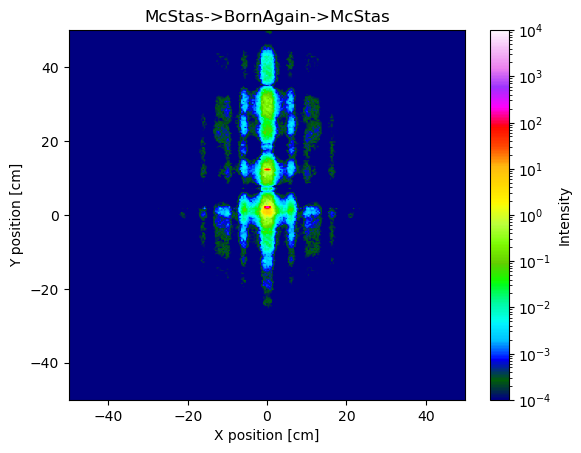

In [8]:
McSim('GISANS_events_scattered')['DETfin'].plot(norm=LogNorm(1e-4, 1e4), cmap='gist_ncar', cbar=True)
title('McStas->BornAgain->McStas');